# Data Analytics Coursework 1 Code Book
Jaykishan Gohil - 221031607


## Import all necessary modules for the pre processing of data 

In [1]:
#Imports of the necessary modules for pre processing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Loading of the dataset

In [2]:
# Loading of the dataset as a pandas dataframe
data_f = pd.read_csv('Asteroid_Updated.csv')
data_f.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [3]:
#The shape of the dataframe tells how many samples and features the dataset has
data_f.shape

(839714, 31)

The shape of the dataframe shows that there are 839714 samples with 31 features

In [4]:
#According to the info of the dataset, it appears that are many numerical and categorical data, thus its important that we are able to distinguish between the two types
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

According to the .info() function there are a range of categorical data as well as numerical data, so the next step will be to seperate them and process them accordingly

In [5]:
#The category will be split into two lists, one for categorical data and one for numerical data
cat,num = [],[]
for entry in data_f.columns:
    if data_f[entry].dtype != "object":
        num.append(entry)
    else:
        cat.append(entry)
print("Categorical Data: ",cat)
print("Numerical Data: ",num)


Categorical Data:  ['name', 'condition_code', 'neo', 'pha', 'diameter', 'extent', 'spec_B', 'spec_T', 'class']
Numerical Data:  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'G', 'moid', 'n', 'per', 'ma']


## Exploratory Data Analysis

In [6]:
data_f.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


Above shows the statistics of our dataset

## Categorical Data

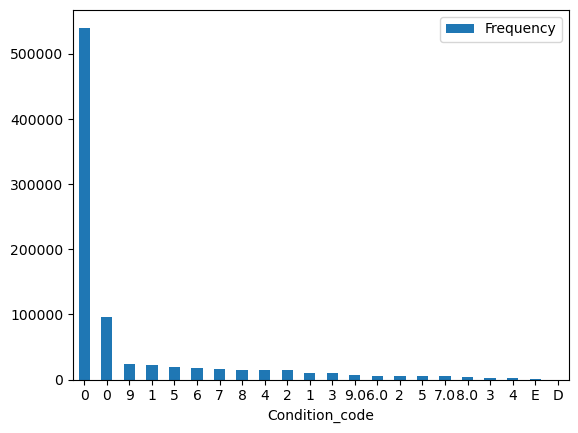

In [7]:
#Here we visualy represent the categorical data to have an understanding of the quantities
category_condition = pd.DataFrame({"Frequency":data_f['condition_code'].value_counts()})
category_condition['Condition_code'] = category_condition.index
category_condition.plot.bar(x="Condition_code",y="Frequency",rot = 0)
plt.show()

The condition code is a metric used to measure the level of orbital uncertancy of an observed sample, it ranges from 0 to F, 0 being the most certain and F being uncertain or insufficent data for determining the orbit of the sample or other factors such as the Eccentricity being assumed rather than determined

According to the visualisation, it appears that most of the samples have a condition code of 0, meaning that those samples are in a position where their orbit can be determined

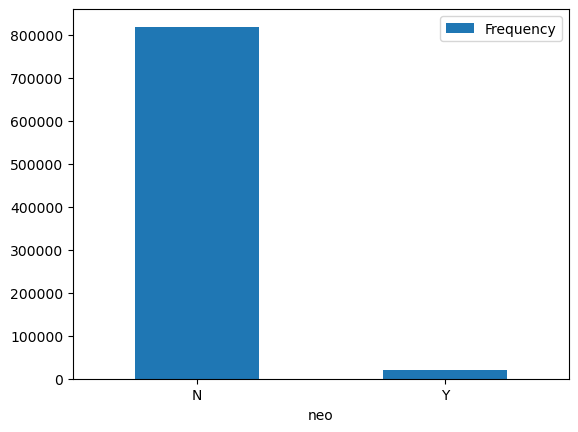

In [8]:
neo_data = pd.DataFrame({'Frequency':data_f['neo'].value_counts()})
neo_data['neo'] = neo_data.index
neo_data.plot.bar(x='neo',y='Frequency',rot=0)
plt.show()

NEO stands for Near Earth Object and this determines whether the position of an observed sample is relatively near or is in the proximity to Earth's orbit. Its known that if an object's orbit is at risk of crossing earth's orbit, its identified as a potentialiy hazardous asteroid

According to our visualisation, the dataset implies that there is a very small portion that is identified as neo

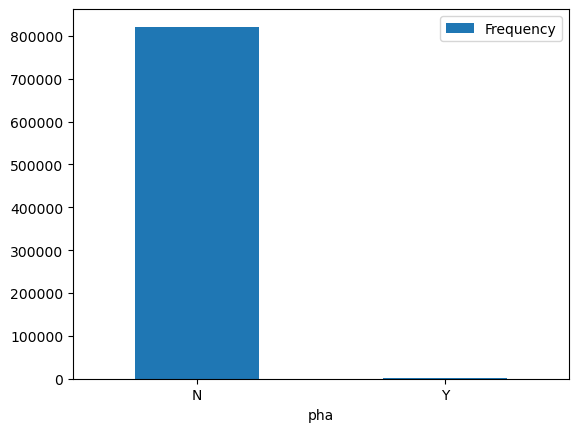

In [9]:
pha_data = pd.DataFrame({'Frequency':data_f['pha'].value_counts()})
pha_data['pha'] = pha_data.index
pha_data.plot.bar(x='pha',y='Frequency',rot=0)
plt.show()

PHA stands for Potentialy Hazardous Asteroid, this variable determines whether an observed sample is a potential danger to Earth for instance its orbital position is at risk of making close approaches to Earth or the object is large enough and close enough that if it were to impact our planet, significant regional damage can be caused

According to the visualisation, only a very small portion of the dataset has samples that identify as a potential hazard

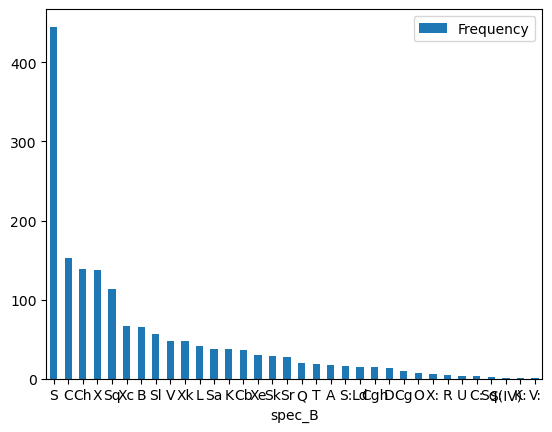

In [10]:
spec_B_data = pd.DataFrame({"Frequency":data_f['spec_B'].value_counts()})
spec_B_data['spec_B'] = spec_B_data.index
spec_B_data.plot.bar(x='spec_B', y='Frequency', rot=0)
plt.show()

Samples that are listed under Spec_B means that they are B_Type asteroids, these asteroids are commonly found in the outer asteroid belt.

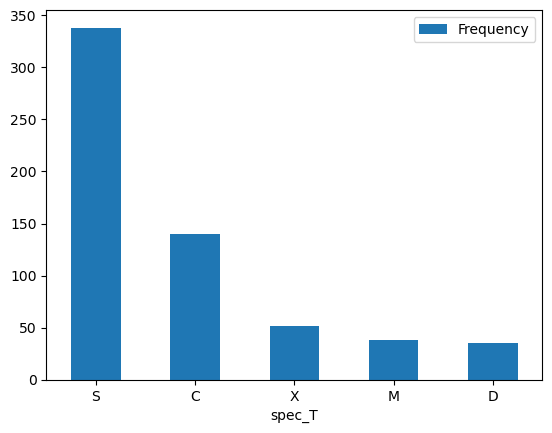

In [11]:
spec_T_data = pd.DataFrame({"Frequency":data_f['spec_T'].value_counts()[:5]})
spec_T_data['spec_T'] = spec_T_data.index
spec_T_data.plot.bar(x='spec_T', y='Frequency', rot=0)
plt.show()

The spectral type of an asteroid is assigned depending on their reflection, spectrum, color and albedo

## Bivariate Analysis

A bivariate analysis is an analysis that explores the relationships between two variables or attributes as well as exploring the depth of their relationships to determine the strength of association and the type of association according to Zwinderman (2005)

### Correlation between the features

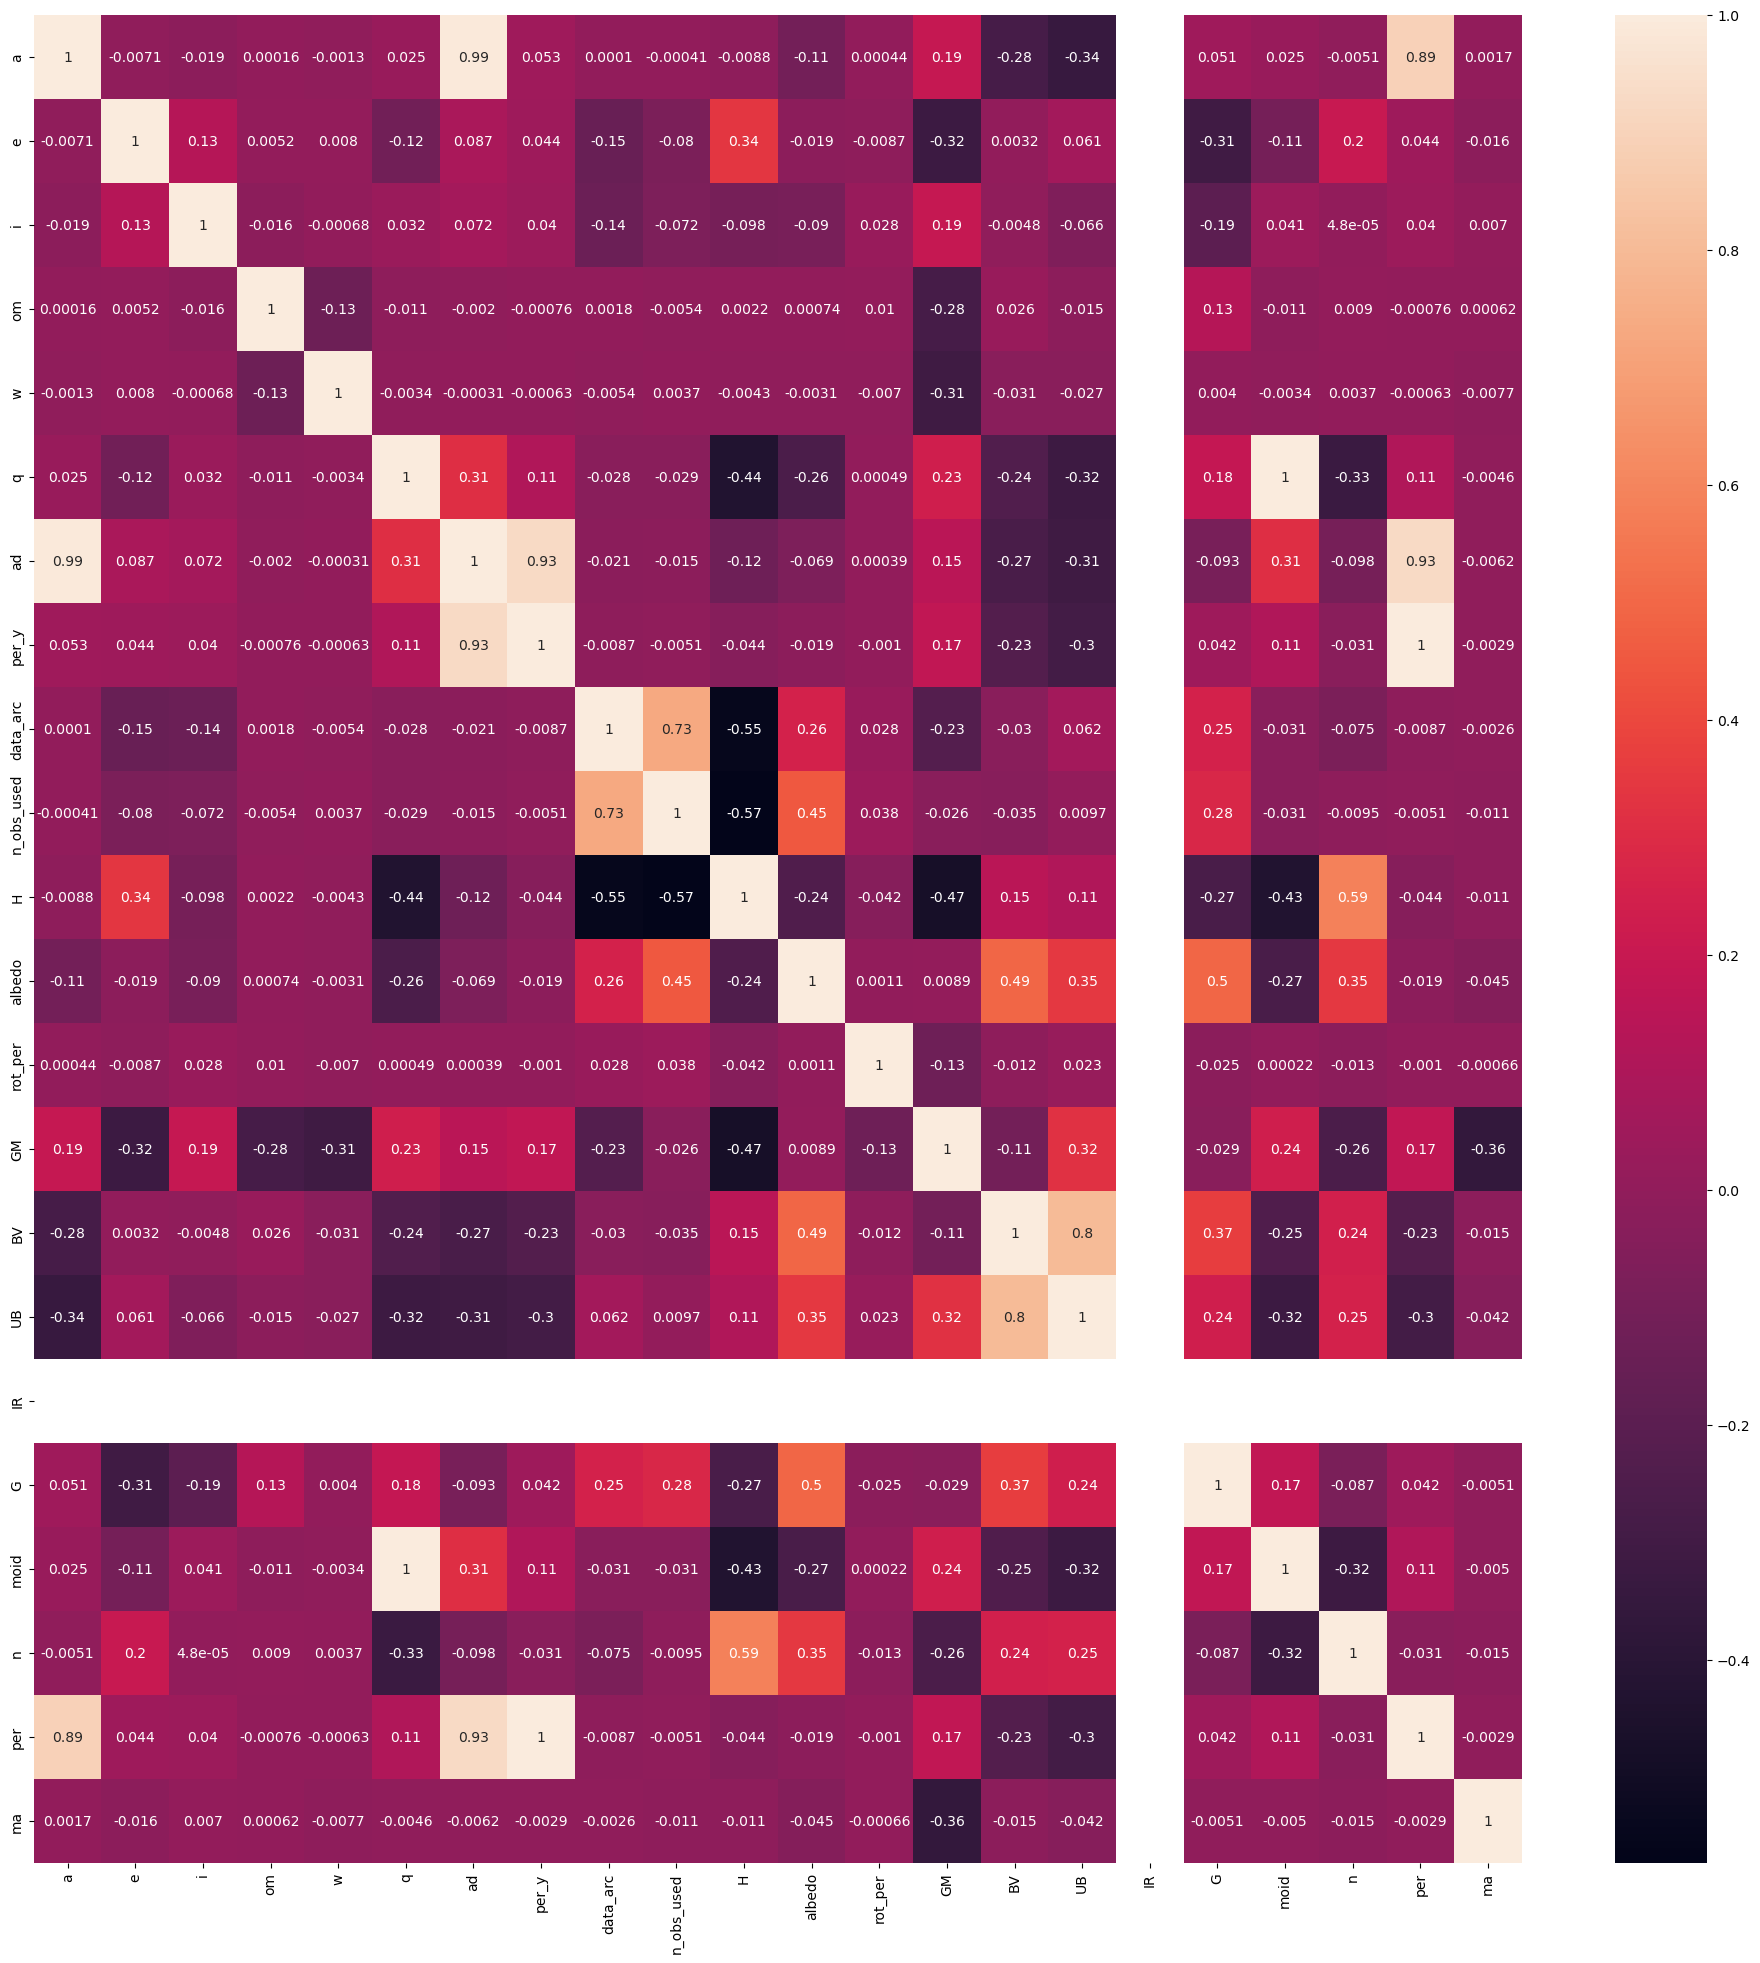

In [12]:
#A heatmap that will visualise the correlation of each variables in the dataset
plt.figure(figsize=(24,24))
data_f_corr = data_f.corr()
sns.heatmap(data_f_corr, annot=True)
plt.show()

In [13]:
#To identify the values which has a great correlation and a negative correlation for numerical data
for column in num:
    dictionary = dict(data_f.corrwith(data_f[column]))
    correrl = {}
    for key,value in dictionary.items():
        if (value > 0.97 or value < -0.97) and (column != key):
            correrl[column] = key
            print(f"{column} has strong correlation with {key}")


            

a has strong correlation with ad
q has strong correlation with moid
ad has strong correlation with a
per_y has strong correlation with per
moid has strong correlation with q
per has strong correlation with per_y


According to the analysis above it appears that 6 numerical variables have a strong correlation with each other, which means that changes to those variables will have an impact on the other, thus adding on difficulty to make an estimation on their relationship

## Chi-Square Test for the relationship between Categorical Data types

The Chi-Square test measures the independance of two variables and is used typically in the analysis of categorical values and their associations with each other according to Plackett (1983)


In [14]:
cat

['name',
 'condition_code',
 'neo',
 'pha',
 'diameter',
 'extent',
 'spec_B',
 'spec_T',
 'class']

In [15]:
testing_cat = cat.copy()
testing_cat.remove('name')
testing_cat

['condition_code',
 'neo',
 'pha',
 'diameter',
 'extent',
 'spec_B',
 'spec_T',
 'class']

In [16]:
for c in range(len(testing_cat)):
    for h in range(c+1, len(testing_cat)):
        correlation_cat = {}
        cross = pd.crosstab(data_f[testing_cat[c]],data_f[testing_cat[h]])
        p_value = stats.chi2_contingency(cross)[1]
        if p_value > 0.05:
            print("No correlation")
        else:
            correlation_cat[testing_cat[c]]=testing_cat[h]
            print(f"{testing_cat[c]} is related to {testing_cat[h]} with the p_values, {p_value}") 
        

condition_code is related to neo with the p_values, 0.0
condition_code is related to pha with the p_values, 3.004239044006414e-245
No correlation
No correlation
condition_code is related to spec_B with the p_values, 2.993862815665779e-96
condition_code is related to spec_T with the p_values, 2.8792242695344553e-43
condition_code is related to class with the p_values, 0.0
neo is related to pha with the p_values, 0.0
neo is related to diameter with the p_values, 0.0
No correlation
neo is related to spec_B with the p_values, 1.0784031329999345e-66
neo is related to spec_T with the p_values, 1.0549449724674979e-13
neo is related to class with the p_values, 0.0
pha is related to diameter with the p_values, 0.0
No correlation
pha is related to spec_B with the p_values, 1.3109230338722967e-22
pha is related to spec_T with the p_values, 9.1499734851376e-05
pha is related to class with the p_values, 0.0
No correlation
No correlation
No correlation
diameter is related to class with the p_values,

P value is the probability of the effect that is observed in the sample if the null hypothesis is true, null hypothesis being the assumption of no relationship between the variables according to Hung .et.al (1997). A high P value means that if that given variable has no effect on the population then depending on the p value, that amount of the population will obtain the effect, i.e how will that variable affect other variables and the population of the dataset

## Missing Values


In [17]:
data_f.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

According to the .isnull() function there are many samples with missing data, some of the variables have 80% to 90% data missing, therefore they need to be processed through being omitted from the dataset or filled in. Since there are missing values in both numerical and categorical datatypes, the next step will be to process them seperatly

In [18]:
for features in cat:
    missing = data_f[features].isnull().sum()
    if missing < 0:
        break
    else:
        print(features," ",missing)

name   817747
condition_code   867
neo   6
pha   16442
diameter   702078
extent   839696
spec_B   838048
spec_T   838734
class   0


These are categorical variables that have missing values, however many of them have around 80% to 90% data missing, therefore they wont be useful for the machine learning model so those variables need to be droped

In [19]:
data_f=data_f.drop('name',axis=1)
data_f=data_f.drop('extent',axis=1)
data_f=data_f.drop('spec_B',axis = 1)
data_f=data_f.drop('spec_T',axis=1)


In [20]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839712 non-null  float64
 1   e               839714 non-null  float64
 2   i               839714 non-null  float64
 3   om              839714 non-null  float64
 4   w               839714 non-null  float64
 5   q               839714 non-null  float64
 6   ad              839708 non-null  float64
 7   per_y           839713 non-null  float64
 8   data_arc        824240 non-null  float64
 9   condition_code  838847 non-null  object 
 10  n_obs_used      839714 non-null  int64  
 11  H               837025 non-null  float64
 12  neo             839708 non-null  object 
 13  pha             823272 non-null  object 
 14  diameter        137636 non-null  object 
 15  albedo          136409 non-null  float64
 16  rot_per         18796 non-null   float64
 17  GM        

There are some categorical parameters that have some missing data, they can be filled in with the mode of all the samples with that column filled 

In [21]:
data_f['condition_code']= data_f['condition_code'].fillna(data_f['condition_code'].mode()[0])
data_f['neo']=data_f['neo'].fillna(data_f['neo'].mode()[0])
data_f['pha']=data_f['pha'].fillna(data_f['pha'].mode()[0])


In [22]:
for feature in num:
    missing = data_f[feature].isnull().sum()
    if missing > 0:
        print(f"{feature} is missing {missing} values")

a is missing 2 values
ad is missing 6 values
per_y is missing 1 values
data_arc is missing 15474 values
H is missing 2689 values
albedo is missing 703305 values
rot_per is missing 820918 values
GM is missing 839700 values
BV is missing 838693 values
UB is missing 838735 values
IR is missing 839713 values
G is missing 839595 values
moid is missing 16442 values
n is missing 2 values
per is missing 6 values
ma is missing 8 values


There are some numerical variables where most of the samples are missing data, so those variables will need to be dropped as they will negativly impact the machine learning model

In [23]:
data_f=data_f.drop('albedo',axis=1)
data_f=data_f.drop('rot_per',axis=1)
data_f=data_f.drop('GM',axis=1)
data_f=data_f.drop('BV',axis=1)
data_f=data_f.drop('UB',axis=1)
data_f=data_f.drop('IR',axis=1)
data_f=data_f.drop('G',axis=1)

For variables that have some data missing, those gaps can be filled in with the mean average of the dataset

In [24]:
data_f['moid']=data_f['moid'].fillna(data_f['moid'].mean())
data_f['H']=data_f['H'].fillna(data_f['H'].mean())
data_f['data_arc']=data_f['data_arc'].fillna(data_f['data_arc'].mean())
data_f['a']=data_f['a'].fillna(data_f['a'].mean())
data_f['per_y']=data_f['per_y'].fillna(data_f['per_y'].mean())
data_f['ma']=data_f['ma'].fillna(data_f['ma'].mean())
data_f['ad']=data_f['ad'].fillna(data_f['ad'].mean())
data_f['n']=data_f['n'].fillna(data_f['n'].mean())
data_f['per']=data_f['per'].fillna(data_f['per'].mean())

In [25]:
data_f.isnull().sum()

a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc               0
condition_code         0
n_obs_used             0
H                      0
neo                    0
pha                    0
diameter          702078
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

## Diameter is the target variables, so entries with that value missing must be dropped from the dataset

According to the information about the dataset so far, the missing values for all variables apart from the diameter have been processed, however since the diameter is the target variable for our machine learning model, samples that have that value missing will not be of use for the machine learning, so those samples need to be dropped

In [26]:
cleaned_data = data_f.dropna()
cleaned_data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,1.09589,MBA,0.238632,1508.600458,282.366289


In [27]:
cleaned_data['Diameter'] = cleaned_data['diameter'].apply(lambda x: float(x))

The Diameter is identified as having a datatype of object, however this will cause an issue in the machine learning process, so it needs to be converted to a float value, which can be done through applying the lambda function.

In [28]:
cleaned_data = cleaned_data.drop('diameter',axis=1)

In [29]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   data_arc        137636 non-null  float64
 9   condition_code  137636 non-null  object 
 10  n_obs_used      137636 non-null  int64  
 11  H               137636 non-null  float64
 12  neo             137636 non-null  object 
 13  pha             137636 non-null  object 
 14  moid            137636 non-null  float64
 15  class           137636 non-null  object 
 16  n               137636 non-null  float64
 17  per       

Now as it can be seen, the missing data has been processed and this dataset is almost ready for training

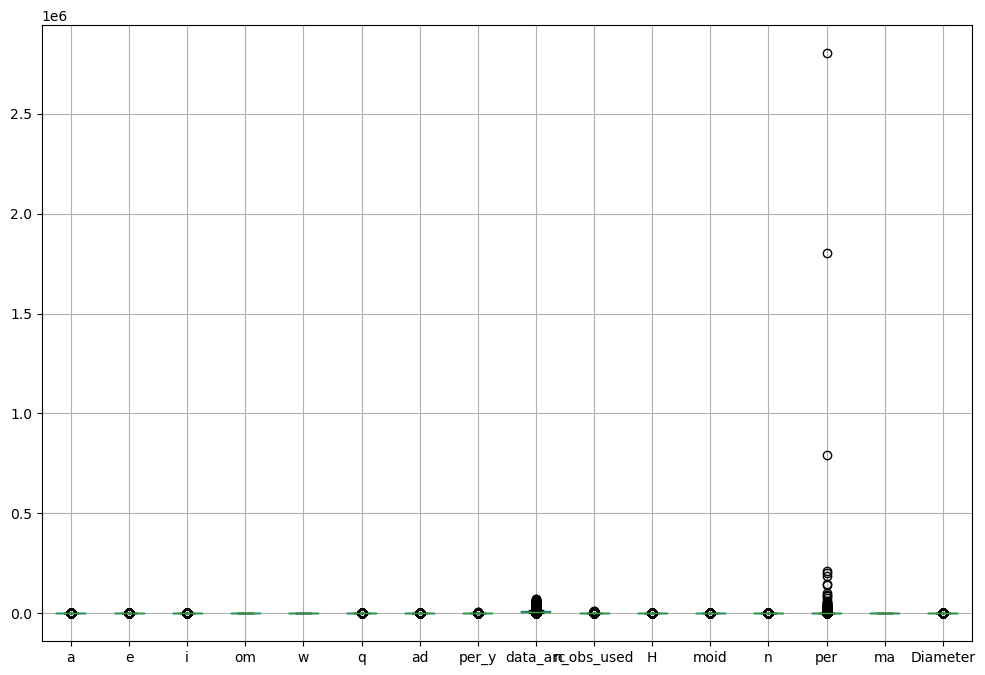

In [30]:
plt.figure(figsize=(12,8))
cleaned_data.boxplot()
plt.show()

However according to the boxplot visualiation, there appears to be outlier samples, which are samples that are distant from other points in the dataset according to Hawkins (1980) , these samples are anomalies in the dataset that could be caused by errors or processing of the dataset, outliers need to be dealt with as it will influence how the machine learning algorithm works, for instance it will affect the predictions made by regression models, therefore leading to less accurate and less useful machine learning models

In [31]:
outliers=[]
def detect_outliers(data):
    
    #Settinng the threshold to be 4, any point that scores beyond this number is an outlier.
    threshold=4
    #This determines the mean average of the dataset.
    mean_average = np.mean(data)
    #The standard deviation of the input data.
    standard_deviation =np.std(data)
    
    #This line of code will loop through the dataset, in which the z score will be computed for each data point through taking the difference from the data point and mean average then dividng by the standard deviation.
    #Z score determines how many standard deviations away from the mean the data point i is.
    for i in data:
        z_score= (i - mean_average)/standard_deviation 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

Z score is a metric that determines a values relationship to the average of the values in the dataset, its measured interms of standard deviation from the mean average according to Curtis .et.al (2016), if the score is zero, it means that the data's value is identical to the mean, although if the z score is 1 and greater it means that its away from the average, thus its an indication of that datapoint being an outlier.

A threshold of 4 is the max that the z score can be for a data to be within the average.

The code will use Z score to detect the outliers in the dataset, a data point with a z score of 4 is considered to be an outlier.

In [32]:
numerical_data = []
for element in cleaned_data.columns:
    if cleaned_data[element].dtype != 'object':
        numerical_data.append(element)
print("Numeric Data :-> ", numerical_data)

Numeric Data :->  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma', 'Diameter']


In [33]:
for element in numerical_data:   
    outlier = detect_outliers(cleaned_data[element])
    if len(outlier) > 0:
        print("Number of outliers for", element, ":----", len(outlier))

Number of outliers for a :---- 50
Number of outliers for e :---- 649
Number of outliers for i :---- 801
Number of outliers for om :---- 801
Number of outliers for w :---- 801
Number of outliers for q :---- 2636
Number of outliers for ad :---- 2685
Number of outliers for per_y :---- 2705
Number of outliers for data_arc :---- 4077
Number of outliers for n_obs_used :---- 4272
Number of outliers for H :---- 5033
Number of outliers for moid :---- 6839
Number of outliers for n :---- 7250
Number of outliers for per :---- 7270
Number of outliers for ma :---- 7270
Number of outliers for Diameter :---- 8184


In [34]:
def outlier_limits(column):
    #Utilising the numpy function to create the percentiles of the data
  Quartile3, Quartile1 = np.percentile(column,[75, 25])
  #To create the interquartile range, subtract the 1st quartile from the 3rd
  InterQuartile = Quartile3 - Quartile1
  #Upper limit
  UpperLimit = Quartile3 + 1.5*InterQuartile
  #Lower Limit
  LowerLimit = Quartile1 - 1.5*InterQuartile
  return UpperLimit, LowerLimit

The interquartile range is a statistical measurement of how dispersed or how spread out the data is, this function would explore the lower limits and upper limits of how spread the dataset is according to Sagar .et.al (2018)

This function will be used to determine the upper and lower limits of the dataset, the code will first use the percentile() function to calculate the 75th and 25th percentiles of the input data, in which the second line of code will calculate the interquartile range of the data, the upper limit will be calculated through taking the interquartile range, multiplying it by 1.5 and adding the third quartile. The lower limit will be determined through subtracting the interquartile range multipled by 1.5 from the first quartile

In [35]:
new_df = pd.DataFrame()

In [36]:
for element in numerical_data:
    UpperLimit, LowerLimit = outlier_limits(cleaned_data[element])
    print(element, "--->","Lower Limit :", round(LowerLimit), " | ","Upper Limit :", round(UpperLimit))
    #If the value falls below the lower limit, replace with the lower limit, if it falls above the upper limit, replace the value with the upper limit
    cleaned_data[element] =   np.where(cleaned_data[element]>UpperLimit, UpperLimit,np.where(cleaned_data[element]<LowerLimit,LowerLimit,cleaned_data[element]))

a ---> Lower Limit : 2  |  Upper Limit : 4
e ---> Lower Limit : 0  |  Upper Limit : 0
i ---> Lower Limit : -8  |  Upper Limit : 27
om ---> Lower Limit : -179  |  Upper Limit : 517
w ---> Lower Limit : -178  |  Upper Limit : 541
q ---> Lower Limit : 1  |  Upper Limit : 4
ad ---> Lower Limit : 2  |  Upper Limit : 4
per_y ---> Lower Limit : 2  |  Upper Limit : 8
data_arc ---> Lower Limit : 1134  |  Upper Limit : 14882
n_obs_used ---> Lower Limit : -938  |  Upper Limit : 2138
H ---> Lower Limit : 12  |  Upper Limit : 19
moid ---> Lower Limit : 0  |  Upper Limit : 3
n ---> Lower Limit : 0  |  Upper Limit : 0
per ---> Lower Limit : 710  |  Upper Limit : 2752
ma ---> Lower Limit : -171  |  Upper Limit : 537
Diameter ---> Lower Limit : -2  |  Upper Limit : 10


This part of the code performs the outlier detection and replacement, in which values that fall outside the calculated limits are replaced, for instance if the value is less than the lower limit, then that value will be replaced with the lower limit, if a given value is greater than the upper limit, it will be replaced with the upper limit.

In [37]:
cleaned_data.to_csv("Cleaned_dat.csv")

In [38]:
dataframe = pd.read_csv("Cleaned_dat.csv")
dataframe

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,...,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.200
1,1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,...,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.200
2,2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,...,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.200
3,3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,...,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.200
4,4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,...,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137631,797860,3.171225,0.159119,26.665712,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,...,50.0,16.20,N,N,1.66301,MBA,0.174527,2062.713583,164.999439,3.793
137632,798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,...,33.0,17.30,N,N,1.36733,MBA,0.242270,1485.943371,145.319581,2.696
137633,798189,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,...,47.0,16.80,N,N,1.43837,MBA,0.176610,2038.391053,174.609920,2.917
137634,799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,...,27.0,17.20,N,N,1.16684,MBA,0.184914,1946.853973,175.708508,3.271


In [39]:
dataframe = dataframe.drop("Unnamed: 0", axis=1)
dataframe.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0.0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0.0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0.0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0.0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


In [40]:
cat, numeric = [],[]

for variables in dataframe:
    if dataframe[variables].dtype == "object":
        cat.append(variables)
    else:
        numeric.append(variables)
print("Numeric data", numeric)
print("Categotic Data",cat)

Numeric data ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma', 'Diameter']
Categotic Data ['neo', 'pha', 'class']


We will need to convert the categorical data into numeric data for our machine learning models

## Categotical Data into numeric data

the pd.get_dummies() function converts categorical variables into dummy or indicator variables that are numerical and can be used in the machine learning models

In [41]:
neo_d = pd.get_dummies(dataframe['neo'],drop_first=True)
neo_d.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [42]:
pha_d = pd.get_dummies(dataframe['pha'],drop_first=True)
pha_d.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [43]:
class_d = pd.get_dummies(dataframe['class'],drop_first=True)
class_d.head()

,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [44]:
new_dataframe = pd.concat([dataframe,neo_d,pha_d,class_d],axis=1)
new_dataframe = new_dataframe.drop(["neo","pha","class"],axis=1)
new_dataframe.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0.0,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0.0,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0.0,...,0,0,0,0,0,1,0,0,0,0


## Machine Learning

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from math import sqrt
import numpy as np


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_dataframe.drop("Diameter",axis=1), new_dataframe["Diameter"],test_size=0.2,random_state=1)

## Linear Regression 

Linear Regression is a machine learning model that assumes that variables have linear dependance on each other, in which variable x is a feature variable or independant variable and variable y is a target variable or known as dependant variable. Therefore it will make predictions of y given the observational data x. 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics, svm, model_selection
import statsmodels.api as sm
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)



LinearRegression()

<AxesSubplot:xlabel='Diameter'>

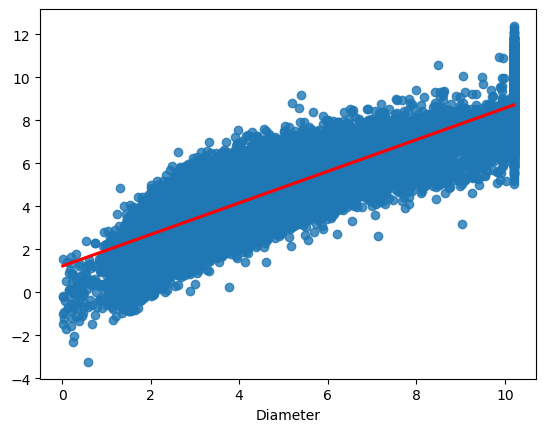

In [48]:
y_prediction_linear_reg = linear_regression.predict(X_test)
sns.regplot(x=y_test,y=y_prediction_linear_reg, line_kws={'color':'red'})


In [49]:
mae = mean_absolute_error(y_test, y_prediction_linear_reg)
mse = mean_squared_error(y_test,y_prediction_linear_reg)
r2 = r2_score(y_test,y_prediction_linear_reg)
rmse = sqrt(mse)

print("mean absolute error is: ",mae)
print("mean_squared error is: ", mse)
print("R Square is:" , r2)


mean absolute error is:  1.0344050307835055
mean_squared error is:  1.5788782259007028
R Square is: 0.7322837296313062


### Cross Validation 

In [87]:
k_folds = KFold(n_splits = 5)
y = new_dataframe["Diameter"]
X = new_dataframe[['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma','Y', 'Y', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO']]

scores = cross_val_score(linear_regression,X,y, cv = k_folds)
print(scores)
print(f"Accurary of model is {scores.mean() *100}")

[0.63199687 0.60862534 0.63605435 0.66764996 0.29092975]
Accurary of model is 56.70512556605922


In [50]:
column_names = new_dataframe.columns.values.tolist()
print(column_names)

['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma', 'Diameter', 'Y', 'Y', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO']


## K Nearest Neighbour

KNN is an instance based classifcation model, in which it dosent learn a model, but it will take instances of data and compare them to historical data to make predictions and classifications

In [51]:
from sklearn.neighbors import KNeighborsRegressor
kneighbour = KNeighborsRegressor(n_neighbors=4)
kneighbour.fit(X_train,y_train)
knn = kneighbour.predict(X_test)

<AxesSubplot:xlabel='Diameter'>

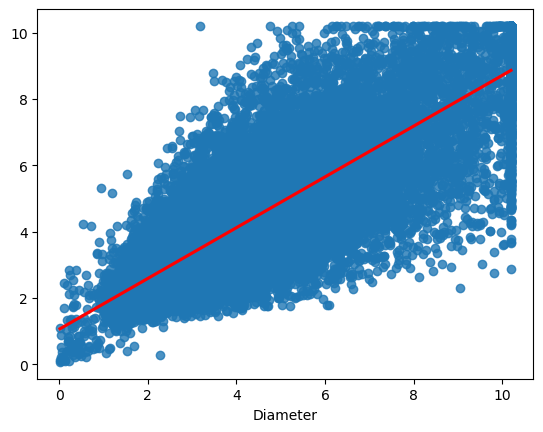

In [52]:
sns.regplot(x=y_test,y=knn, line_kws={'color':'red'})


In [53]:
mae = mean_absolute_error(y_test,knn)
mse = mean_squared_error(y_test,knn)
r2 = r2_score(y_test,knn)
rmse = sqrt(mse)

print("mean absolute error is: ",mae)
print("mean_squared error is: ", mse)
print("R Square is:" , r2)

mean absolute error is:  0.9436661399302528
mean_squared error is:  1.700166675121694
R Square is: 0.711717931248899


### Cross Validation

In [88]:
scores = cross_val_score(kneighbour,X,y, cv = k_folds)
print(scores)
print(f"Accurary of model is {scores.mean() *100}")

[0.51527017 0.57123109 0.58243641 0.6818198  0.31621143]
Accurary of model is 53.33937800907358


## Decison Tree

Decision Trees are a supervised learning method used for regression as well as classifcation, the aims of using a decision tree is to create a model that can predict a target vairable through learning the rules and processes taken to make a decision given the features of the dataset

In [54]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
dtp = decision_tree.predict(X_test)

<AxesSubplot:xlabel='Diameter'>

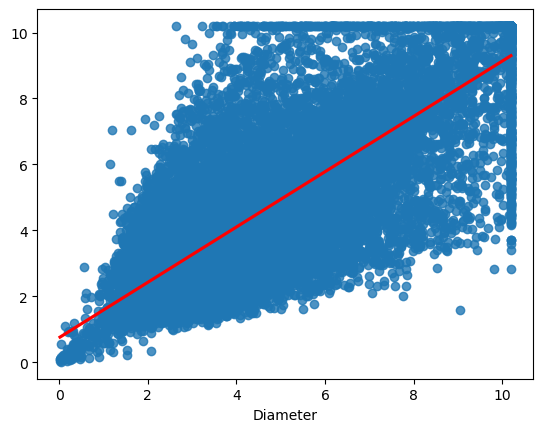

In [55]:
sns.regplot(x=y_test,y=dtp, line_kws={'color':'red'})


In [56]:
mae = mean_absolute_error(y_test,dtp)
mse = mean_squared_error(y_test,dtp)
r2 = r2_score(y_test,dtp)
rmse = sqrt(mse)

print("mean absolute error is: ",mae)
print("mean_squared error is: ", mse)
print("R Square is:" , r2)

mean absolute error is:  0.9159968759081705
mean_squared error is:  1.914206955463528
R Square is: 0.6754250337842473


### Cross Validation 

In [85]:
scores = cross_val_score(decision_tree,X,y, cv = k_folds)
print(scores)
print(f"Accurary of model is {scores.mean() *100}")


[0.61583861 0.54023809 0.53532415 0.45917068 0.47718208 0.5638161
 0.58458691 0.69276386 0.64171146 0.15380258]
Accurary of model is 52.64434514863028


## Random Forest Regression

A random forest is essentialy a group of decision tress applied to many subsets of the dataset, in which it combines the predictions made from decision trees 

In [57]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
random_forest_y= random_forest.predict(X_test)

<AxesSubplot:xlabel='Diameter'>

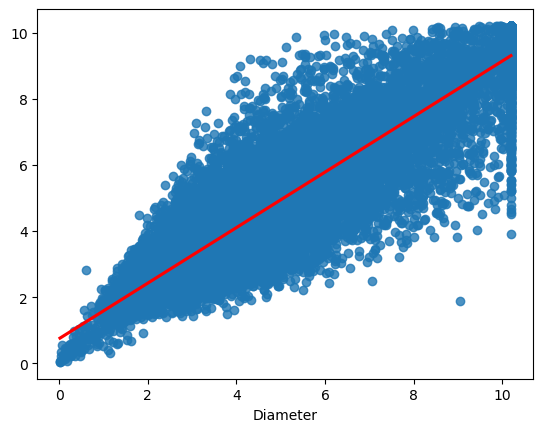

In [58]:
sns.regplot(x=y_test,y=random_forest_y, line_kws={'color':'red'})


In [59]:
mae = mean_absolute_error(y_test,random_forest_y)
mse = mean_squared_error(y_test,random_forest_y)
r2 = r2_score(y_test,random_forest_y)
rmse = sqrt(mse)

print("mean absolute error is: ",mae)
print("mean_squared error is: ", mse)
print("R Square is:" , r2)

mean absolute error is:  0.6858850029061324
mean_squared error is:  0.9371754717419337
R Square is: 0.841091530771702


### Cross Validation

In [89]:

scores = cross_val_score(random_forest,X,y, cv = k_folds)
print(scores)
print(f"Accurary of model is {scores.mean() *100}")

[0.75283468 0.74856547 0.75560269 0.82336987 0.75269417]
Accurary of model is 76.66133761011088


# Other Machine Learning Models (Experimental)

In [60]:
dataframe_ml = new_dataframe.loc[:,~new_dataframe.columns.duplicated()]

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataframe_ml.drop("Diameter",axis=1),dataframe_ml["Diameter"],test_size=0.2,random_state=1)

## XGBoost Regressor

XGBoost Regressor implements machine learning algorithims through the gradient boosting framework, in which it makes use of gradient boosting for regression and predictive modeling.

In [62]:
from xgboost import XGBRegressor
xgb_regression = XGBRegressor()
xgb_regression.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
xgb_yprediction = xgb_regression.predict(X_test)
mae = mean_absolute_error(y_test,xgb_yprediction)
mse = mean_squared_error(y_test,xgb_yprediction)
r2 = r2_score(y_test,xgb_yprediction)
rmse = sqrt(mse)

print("mean absolute error is: ",mae)
print("mean_squared error is: ", mse)
print("R Square is:" , r2)

mean absolute error is:  0.6977310470683836
mean_squared error is:  0.9485999870544888
R Square is: 0.8391543778107745


<AxesSubplot:xlabel='Diameter'>

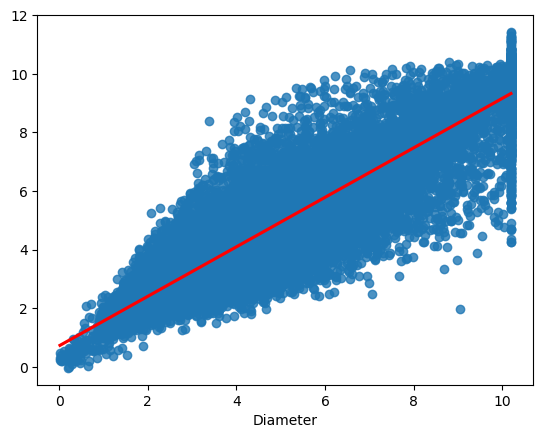

In [64]:
sns.regplot(x=y_test,y=xgb_yprediction, line_kws={'color':'red'})



## Artifical Neural Network

Artifical Neural Networks are inspired by the human brain, in which it aims to simulate how biological neurons signal to one another. This form of machine learning rely on training data to learn and improve their accuracy overtime.

In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
a = Sequential()
a.add(Dense(input_dim=X_train.shape[1], units=12, kernel_initializer="he_uniform",activation="relu"))
a.add(Dense(units=10, kernel_initializer="he_uniform",activation="relu"))
a.add(Dense(units=1, activation="relu"))

In [67]:
a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                336       
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 477
Trainable params: 477
Non-trainable params: 0
_________________________________________________________________


In [68]:
a.compile(optimizer="adam", loss="mean_squared_error")

In [69]:
a_r = a.fit(X_train,y_train,validation_split=0.3,epochs=200, batch_size=100)

Epoch 1/200
771/771 [==============================] - 4s 2ms/step - loss: 32.6246 - val_loss: 26.7338
Epoch 2/200
771/771 [==============================] - 1s 2ms/step - loss: 26.7276 - val_loss: 26.7338
Epoch 3/200
771/771 [==============================] - 1s 2ms/step - loss: 26.7276 - val_loss: 26.7338
Epoch 4/200
771/771 [==============================] - 1s 2ms/step - loss: 26.7278 - val_loss: 26.7338
Epoch 5/200
771/771 [==============================] - 1s 2ms/step - loss: 26.7277 - val_loss: 26.7338
Epoch 6/200
771/771 [==============================] - 2s 2ms/step - loss: 26.7277 - val_loss: 26.7338
Epoch 7/200
771/771 [==============================] - 2s 2ms/step - loss: 26.7277 - val_loss: 26.7338
Epoch 8/200
771/771 [==============================] - 1s 2ms/step - loss: 26.7277 - val_loss: 26.7338
Epoch 9/200
771/771 [==============================] - 2s 2ms/step - loss: 26.7277 - val_loss: 26.7338
Epoch 10/200
771/771 [==============================] - 2s 3ms/step - los

In [70]:
a_ypred = a.predict(X_test)


861/861 [==============================] - 1s 1ms/step


<AxesSubplot:xlabel='Diameter'>

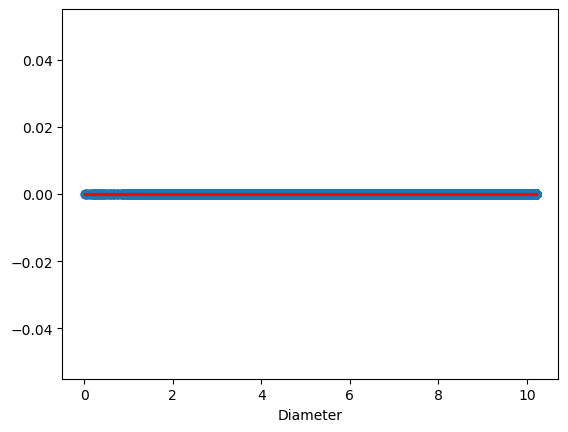

In [71]:
sns.regplot(x=y_test,y=a_ypred, line_kws={'color':'red'})


In [72]:
mae = mean_absolute_error(y_test,a_ypred)
mse = mean_squared_error(y_test,a_ypred)
r2 = r2_score(y_test,a_ypred)
rmse = sqrt(mse)

print("mean absolute error is: ",mae)
print("mean_squared error is: ", mse)
print("R Square is:" , r2)

mean absolute error is:  4.58187173060157
mean_squared error is:  26.891128944529203
R Square is: -3.5596884097417103


## OLS Regression

In [73]:
y = new_dataframe["Diameter"]
x = new_dataframe[['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma','Y', 'Y', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Diameter   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.422e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:08:38   Log-Likelihood:            -2.2711e+05
No. Observations:              137636   AIC:                         4.543e+05
Df Residuals:                  137609   BIC:                         4.545e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             32.7988      1.134     28.

## References

BALL, NICHOLASM and BRUNNER, ROBERT.J. (2010) “Data Mining and machine learning in astronomy,” International Journal of Modern Physics D, 19(07), pp. 1049–1106. Available at: https://doi.org/10.1142/s0218271810017160. 

Cellino, A. et al. (2015) “On the calibration of the relation between geometric albedo and polarimetric properties for the asteroids,” Monthly Notices of the Royal Astronomical Society, 451(4), pp. 3473–3488. Available at: https://doi.org/10.1093/mnras/stv1188. 

Curtis, A. et al. (2016) “The mystery of the z-score,” AORTA, 04(04), pp. 124–130. Available at: https://doi.org/10.12945/j.aorta.2016.16.014. 

Dermott, S.F. and Murray, C.D. (1982) “Asteroid rotation rates depend on diameter and type,” Nature, 296(5856), pp. 418–421. Available at: https://doi.org/10.1038/296418a0. 

Harris, A.W. and D’Abramo, G. (2015) “The population of near-earth asteroids,” Icarus, 257, pp. 302–312. Available at: https://doi.org/10.1016/j.icarus.2015.05.004. 

Hawkins, D.M. (1980) “Multiple outliers,” Identification of Outliers, pp. 51–73. Available at: https://doi.org/10.1007/978-94-015-3994-4_5. 

Hung, H.M. et al. (1997) “The behaviour of the P-value when the alternative hypothesis is true,” Biometrics, 53(1), p. 11. Available at: https://doi.org/10.2307/2533093. 

Feigelson, E.D. and Babu, G.J. (1992) “Linear regression in astronomy. II,” The Astrophysical Journal, 397, p. 55. Available at: https://doi.org/10.1086/171766. 

Janiesch, C., Zschech, P. and Heinrich, K. (2021) “Machine learning and deep learning,” Electronic Markets, 31(3), pp. 685–695. Available at: https://doi.org/10.1007/s12525-021-00475-2. 

Kotsiantis, S.B. (2011) “Decision trees: A recent overview,” Artificial Intelligence Review, 39(4), pp. 261–283. Available at: https://doi.org/10.1007/s10462-011-9272-4. 

Manocha, S. and Girolami, M.A. (2007) “An empirical analysis of the probabilistic K-nearest neighbour classifier,” Pattern Recognition Letters, 28(13), pp. 1818–1824. Available at: https://doi.org/10.1016/j.patrec.2007.05.018. 

NASA Jet Propulsion Laboratory (JPL) - robotic space exploration (2023) NASA. NASA. Available at: https://www.jpl.nasa.gov/ (Accessed: March 10, 2023). 

Nesvorný, D., Broz, M. and Carruba, V. (2015) “Identification and dynamical properties of asteroid families,” Asteroids IV [Preprint]. Available at: https://doi.org/10.2458/azu_uapress_9780816532131-ch016.

Ostro, S.J. et al. (2002) “Asteroid radar astronomy,” Asteroids III, pp. 151–168. Available at: https://doi.org/10.2307/j.ctv1v7zdn4.18. 

Plackett, R.L. (1983) “Karl Pearson and the Chi-Squared Test,” International Statistical Review / Revue Internationale de Statistique, 51(1), p. 59. Available at: https://doi.org/10.2307/1402731. 

Pesenson, M.Z., Pesenson, I.Z. and McCollum, B. (2010) “The data big bang and the expanding digital universe: High-dimensional, complex and massive data sets in an inflationary epoch,” Advances in Astronomy, 2010, pp. 1–16. Available at: https://doi.org/10.1155/2010/350891. 

Pravec, P., Harris, A.W. and Michalowski, T. (2002) “Asteroid rotations,” Asteroids III, pp. 113–122. Available at: https://doi.org/10.2307/j.ctv1v7zdn4.15. 

Reitsma, J.B. et al. (2005) “Bivariate analysis of sensitivity and specificity produces informative summary measures in diagnostic reviews,” Journal of Clinical Epidemiology, 58(10), pp. 982–990. Available at: https://doi.org/10.1016/j.jclinepi.2005.02.022. 

Rodriguez-Galiano, V. et al. (2015) “Machine learning predictive models for mineral prospectivity: An evaluation of neural networks, random forest, regression trees and support vector machines,” Ore Geology Reviews, 71, pp. 804–818. Available at: https://doi.org/10.1016/j.oregeorev.2015.01.001.

Vinutha, H.P., Poornima, B. and Sagar, B.M. (2018) “Detection of outliers using interquartile range technique from Intrusion Dataset,” Advances in Intelligent Systems and Computing, pp. 511–518. Available at: https://doi.org/10.1007/978-981-10-7563-6_53. 

SHEVCHENKO, V. and TEDESCO, E. (2006) “Asteroid albedos deduced from Stellar Occultations,” Icarus, 184(1), pp. 211–220. Available at: https://doi.org/10.1016/j.icarus.2006.04.006. 

Ward, S. (2000) “Asteroid impact tsunami: A probabilistic hazard assessment,” Icarus, 145(1), pp. 64–78. Available at: https://doi.org/10.1006/icar.1999.6336. 
